In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, nsolve, log

## Constants

To be changed:

In [46]:
U_G = 12.32 # Geostrophic velocity [m/s]
D = 154 # Rotor diameter [m]
z_h = 106 # hub height [m]
s_x = 10 # Streamwise distance [D]
s_y = 10 # Transverse distance [D]

Not to be changed:

In [47]:
delta_ibl_0 = z_h

C = 4.0 # Empirical constant [-]
C_star = 4.5 # Friction velocity constant [-]

f = 1*10**(-4) # Coriolis parameter [1/s]
k = 0.4 # Von Karman constant [-]

C_T = 0.84 # Thrust coefficient [-]
C_P = 0.4 # Power coefficient [-]

rho = 1.2 # Air density [kg/m^3]
z_0lo = 0.0001 # surface rughness length [m] 

## $c_{ft}$, $v_w^*$ and $\beta$

Planform Thrust Coefficient: $c_{ft} = \frac{\pi C_T}{4 s_x s_y}$

Eddy Viscosity: $ \nu _w^* = 28 \sqrt{\frac{1}{2}c_{ft}} $

Wake Expansion Parameter: $ \beta = \frac{\nu _w^*}{1 + \nu _w^*} $

In [48]:
c_ft = (np.pi * C_T)/(4*s_x*s_y)
print("Planform Thrust Coefficient: ", round(c_ft,3), "[-]")

v_w_star = 28 * np.sqrt(1/2*c_ft)
print("Eddy Viscosity: ", round(v_w_star,2), "[-]")

beta = v_w_star / (1 + v_w_star)
print("Wake Expansion Parameter: ", round(beta,2), "[-]")

Planform Thrust Coefficient:  0.007 [-]
Eddy Viscosity:  1.61 [-]
Wake Expansion Parameter:  0.62 [-]


## $z_{0,hi}$ and $u_*$

Effective Roughness Height: $ z_{0,hi} = z_h \left( 1+\frac{D}{2z_h} \right)^{\beta} \cdot \exp \left( - \left[ \frac{c_{ft}}{2{\kappa^2}}+ \left( \ln \left[ \frac{z_h}{z_{0,lo}} \left( 1-\frac{D}{2z_h} \right) ^{\beta} \right] \right)^{-2} \right]^{-\frac{1}{2}} \right) $

Friction Velocity: $ u_* = \frac{\kappa U_G}{\ln \left( \frac{U_G}{f z_0} \right) - C_*}  $

In [49]:
z_0hi = z_h * (1 + D/(2 * z_h))**beta * np.exp(-(c_ft/(2 * k**2) + (np.log(z_h / z_0lo * (1 - D/(2 * z_h))**beta))**-2)**-0.5)
print("Effective Roughness Height: ", round(z_0hi, 4), "m")

u_star_lo = (k * U_G) / (np.log(U_G / (f * z_0lo)) - C_star)
u_star_hi = (k * U_G) / (np.log(U_G / (f * z_0hi)) - C_star)
print("Friction Velocity lo: ", round(u_star_lo, 4), "m/s")
print("Friction Velocity hi: ", round(u_star_hi, 4), "m/s")

Effective Roughness Height:  0.3177 m
Friction Velocity lo:  0.2999 m/s
Friction Velocity hi:  0.5889 m/s


## $U_{h0}$ and $U_{hT}$

In [50]:
U_h0 = u_star_lo / k * np.log(z_h / z_0lo)
print('Unperturbed Wind Speed: ', round(U_h0, 2), 'm/s')

U_hT = u_star_hi / k * np.log((z_h / z_0hi) * (1 + (D/(2*z_h)))**beta)
print('Wind Speed (fully developed): ', round(U_hT, 2), 'm/s')

Unperturbed Wind Speed:  10.4 m/s
Wind Speed (fully developed):  9.05 m/s


## $P$, $P_0$ and $\frac{P}{P_0}$

Single Turbine Power: $ P = C_P \frac{\rho}{2} U \pi \frac{D^2}{4}$

In [51]:
P_0 = C_P * rho/2 * U_h0**3 * np.pi * D**2 / 4
print("Ideal Power: ", round(P_0/1000000, 2), "MW")

P = C_P * rho/2 * U_hT**3 * np.pi * D**2 / 4
print("Power (fully developed): ", round(P/1000000, 2), "MW")

P_P0 = (U_hT / U_h0)**3
print('Power Ratio P/P0: ', round(P_P0, 2), '[-]')

Ideal Power:  5.03 MW
Power (fully developed):  3.31 MW
Power Ratio P/P0:  0.66 [-]


## GRAPH: $\frac{P}{P_0}$ VS. $s$

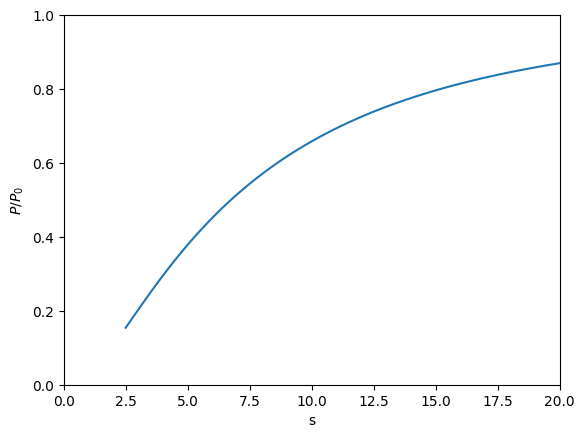

In [52]:
s_values = np.linspace(2.5, 20, 100)
P_P0_values = []

for s in s_values:
    s_x_local = s**2 / s_y
    c_ft_local = (np.pi * C_T) / (4 * s_x_local * s_y)
    v_w_star_local = 28 * np.sqrt(1 / 2 * c_ft_local)
    beta_local = v_w_star_local / (1 + v_w_star_local)
    z_0hi_local = z_h * (1 + D / (2 * z_h))**beta_local * np.exp(-(c_ft_local / (2 * k**2) + (np.log(z_h / z_0lo * (1 - D / (2 * z_h))**beta_local))**-2)**-0.5)
    u_star_lo_local = (k * U_G) / (np.log(U_G / (f * z_0lo)) - C_star)
    u_star_hi_local = (k * U_G) / (np.log(U_G / (f * z_0hi_local)) - C_star)
    U_h0_local = u_star_lo_local / k * np.log(z_h / z_0lo)
    U_hT_local = u_star_hi_local  / k * np.log((z_h / z_0hi_local) * (1 + D / (2 * z_h))**beta_local)
    P_P0_local = (U_hT_local / U_h0_local)**3
    P_P0_values.append(P_P0_local)

plt.plot(s_values, P_P0_values)
plt.xlim(0, 20)
plt.ylim(0, 1)
plt.xlabel('s')
plt.ylabel(r'$P/P_0$')
plt.show()

## GRAPH: $\frac{u_*(x)}{u_*}$ and $\frac{\delta_{ibl}(x)}{z_{0,hi}}$ VS. $\frac{x}{z_{0,hi}}$

Internal Boundary Layer height as function of downstream distance: $ \delta_{ibl}(x) = \delta_{ibl}(0) + z_{0,hi} \cdot \left( \frac{x}{z_{0,hi}} \right)^{4/5} $

Friction Velocity as function of downstream distance: $ u_*(x) = u_* \frac{\ln \left( \frac{\delta_{ibl}(x)}{z_{0,lo}} \right)}{\ln \left( \frac{\delta_{ibl}(x)}{z_{0,hi}} \right)}, \;\;\; \delta_{ibl}(x) < H^*_G $

Height of ABL when $u_*(x) = u_{*hi}$

ABL height at u*(x) = u*hi:  1368 m


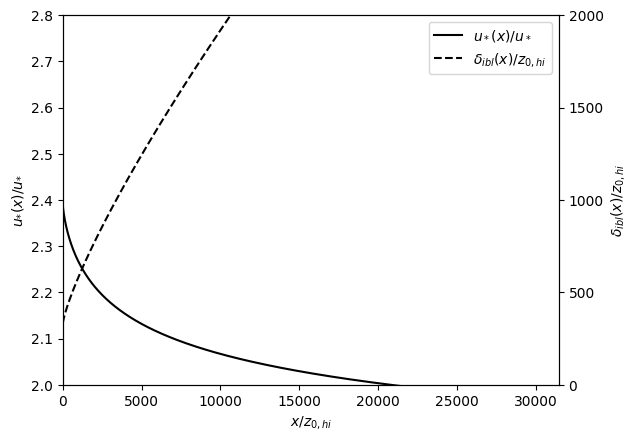

In [53]:
from FrictionIBLheight import FrictionIBLheight
delta_ibl_x, H_G = FrictionIBLheight(delta_ibl_0, z_0hi, z_0lo, z_h, s_x, D, f, k, C_star, C, U_G)

Hub-height velocity as a function of downstream distance: $ U_{hT}(x) = \frac{u_*}{\kappa} \frac{\ln \left( \frac{\delta_{ibl}(x)}{z_{0,lo}} \right)}{\ln \left( \frac{\delta_{ibl}(x)}{z_{0,hi}} \right)} \ln \left[ \left( \frac{z_h}{z_{0,hi}} \right) \left( 1 + \frac{D}{2 z_h} \right)^{\beta} \right] $

Hub-height Wind Speed at leading edge:  11.0 m/s
9.04953590001805


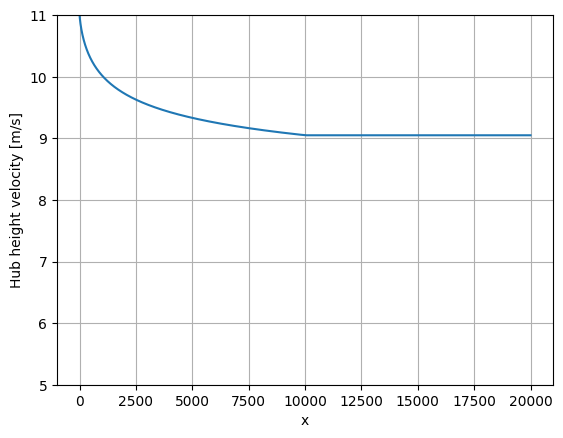

In [54]:
U_hT_x = (u_star_lo / k) * (np.log(delta_ibl_x / z_0lo) / np.log(delta_ibl_x / z_0hi)) * np.log((z_h / z_0hi) * (1 + D/(2 * z_h))**beta)
print("Hub-height Wind Speed at leading edge: ", round(U_hT_x[0], 2), "m/s")
print(min(U_hT_x))

from HubHeightVelocity import U_hT
U_hT_x = U_hT(delta_ibl_x, z_0hi, k, z_0lo, u_star_lo, z_h, D, beta, H_G)

## GRAPH: $P$ VS. Turbine Number $\left( x / (sD) \right)$

ValueError: x and y must have same first dimension, but have shapes (10000,) and (20000,)

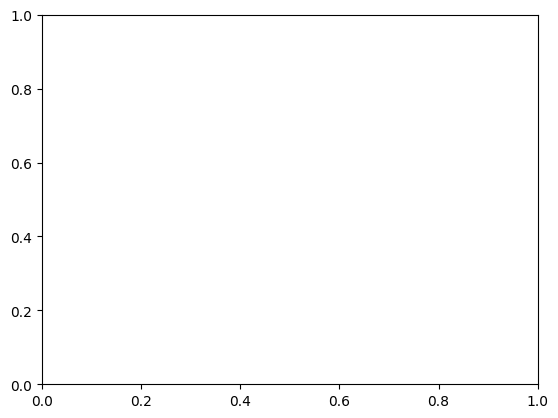

In [55]:
P_x = (C_P * rho/2 * U_hT_x**3 * np.pi * D**2 / 4)/1e6

x_len = 10000
x = np.arange(0, x_len)

plt.plot(x, P_x)
plt.xlabel('x')
plt.ylabel('P [MW]')
plt.grid(True)
plt.show()

## Exponential Wake Recovery S. Emeis

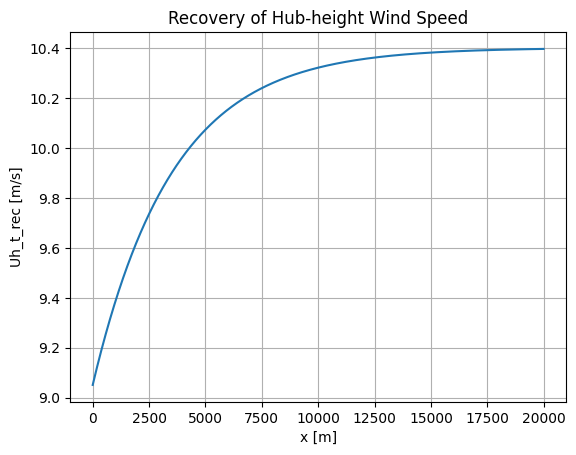

In [ ]:
# Define Fully Developed Wind Speed at the hub height as U_d
U_d = min(U_hT_x)
a = k * u_star_lo * z_h/(2*z_h)**2
x = np.arange(1, 20001)
Uh_t_rec = U_h0 + U_h0 * ((U_d)/(U_h0)-1) * np.exp(-a*x)

plt.plot(x, Uh_t_rec)
plt.xlabel('x [m]')
plt.ylabel('Uh_t_rec [m/s]')
plt.title('Recovery of Hub-height Wind Speed')
plt.grid(True)
plt.show()


## Reverse IBL recovery

5.257819883713345


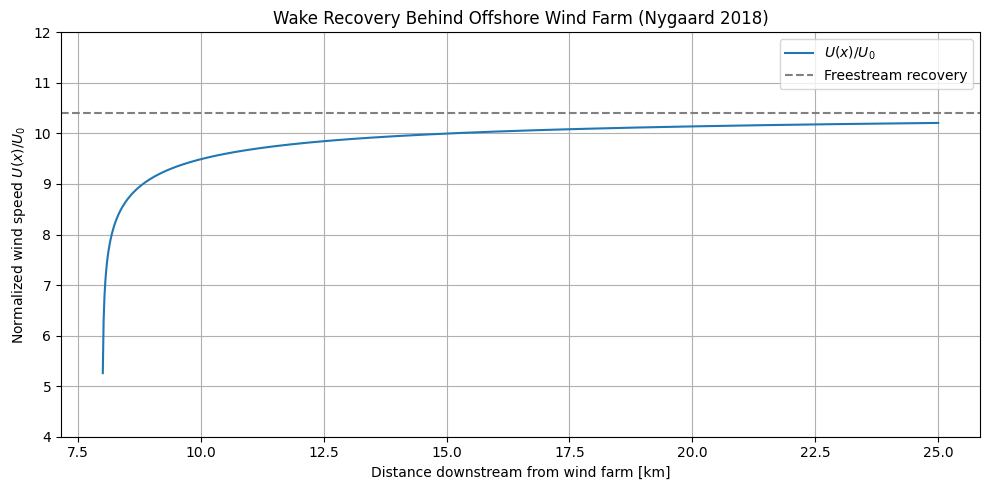

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
z_H = 106        # hub height (m)
z_0 = 0.0001      # ambient roughness length (m)
x1 = 0            # start of wind farm
x2 = 8e3          # end of wind farm at 8 km
D = 154          # rotor diameter (m)
z_0 = 0.0001     # upstream roughness (m)
kappa = 0.4
CT = 0.84
sd = 10 * D       # streamwise spacing (m)
sc = 10 * D       # cross-stream spacing (m)

x = np.linspace(x2 + 10, x2 + 17000, 1000)  # downstream x beyond the farm

# Scaled thrust coefficient
ct = (np.pi * CT * D**2) / (8 * sd * sc)

# Eddy viscosity and beta
nu_star = 28 * np.sqrt(ct)
beta = nu_star / (1 + nu_star)

z0_WF = z_H * (1 + D / (2 * z_H))**beta * np.exp(-kappa * (ct + (kappa / np.log((z_H / z_0) * (1 - D / (2 * z_H))**beta))**2)**-0.5)

# Calculate h1 and h2
h1 = z0_WF * (z_H / z0_WF + ((x - x1)/z0_WF)**(4/5))
h2 = z0_WF * ((x - x2)/z0_WF)**(4/5)

# Recovery function U(x)/U0
U_over_U0 = 10.4 * (np.log(h1/z_0) * np.log(h2/z0_WF)) / (np.log(h1/z0_WF) * np.log(h2/z_0))
print(U_over_U0[0])

# Filter x and U_over_U0 for x >= 8000
x_filtered = x[x >= 8000]
U_over_U0_filtered = U_over_U0[x >= 8000]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(x_filtered / 1000, U_over_U0_filtered, label=r'$U(x)/U_0$')
plt.axhline(10.4, color='gray', linestyle='--', label='Freestream recovery')
plt.xlabel('Distance downstream from wind farm [km]')
plt.ylabel('Normalized wind speed $U(x)/U_0$')
plt.title('Wake Recovery Behind Offshore Wind Farm (Nygaard 2018)')
plt.ylim(4, 12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()